# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms ‚Äì the one that predicts everything as the most popular class.

In [444]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df = pd.read_csv('../data/checker_submits.csv')
print("–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:")
print(df.head())
print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: {df.shape}")

–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:
      uid   labname  numTrials                   timestamp
0  user_4  project1          1  2020-04-17 05:19:02.744528
1  user_4  project1          2  2020-04-17 05:22:45.549397
2  user_4  project1          3  2020-04-17 05:34:24.422370
3  user_4  project1          4  2020-04-17 05:43:27.773992
4  user_4  project1          5  2020-04-17 05:46:32.275104
–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: (1686, 4)


In [445]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.day_of_week
# df['dayofweek'].min()

print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: {df.shape}")
df
df.max()
df.describe()

# df.max(numeric_only=True) - df.min(numeric_only=True)


–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: (1686, 6)


numTrials                      timestamp         hour    dayofweek
count  1686.000000                           1686  1686.000000  1686.000000
mean     25.720641  2020-05-07 02:23:36.397669632    15.957295     3.361210
min       1.000000     2020-04-17 05:19:02.744528     0.000000     0.000000
25%       4.000000  2020-05-02 09:44:33.389479936    13.000000     2.000000
50%      13.000000  2020-05-09 22:41:09.708265472    16.000000     3.000000
75%      36.000000  2020-05-13 21:17:20.682178304    20.000000     5.000000
max     164.000000     2020-05-21 20:37:00.290491    23.000000     6.000000
std      31.354122                            NaN     4.277533     1.985261

In [446]:
final_df = df[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']].copy()
print("–î–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(final_df.head(10))

–î–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
      uid   labname  numTrials  hour  dayofweek
0  user_4  project1          1     5          4
1  user_4  project1          2     5          4
2  user_4  project1          3     5          4
3  user_4  project1          4     5          4
4  user_4  project1          5     5          4
5  user_4  project1          6     5          4
6  user_4  project1          7     5          4
7  user_4    laba04          1    11          4
8  user_4    laba04          2    11          4
9  user_4    laba04          3    11          4


In [447]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏:")
dayofweek_counts = final_df['dayofweek'].value_counts().sort_index()
days_names = ['–ü–Ω', '–í—Ç', '–°—Ä', '–ß—Ç', '–ü—Ç', '–°–±', '–í—Å']
for day, count in dayofweek_counts.items():
    print(f"{days_names[day]} ({day}): {count}")

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏:
–ü–Ω (0): 136
–í—Ç (1): 274
–°—Ä (2): 149
–ß—Ç (3): 396
–ü—Ç (4): 104
–°–± (5): 271
–í—Å (6): 356


In [448]:
# –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = final_df.drop('dayofweek', axis=1)
y = final_df['dayofweek']
X

uid   labname  numTrials  hour
0      user_4  project1          1     5
1      user_4  project1          2     5
2      user_4  project1          3     5
3      user_4  project1          4     5
4      user_4  project1          5     5
...       ...       ...        ...   ...
1681  user_19   laba06s          9    20
1682   user_1   laba06s          6    20
1683   user_1   laba06s          7    20
1684   user_1   laba06s          8    20
1685   user_1   laba06s          9    20

[1686 rows x 4 columns]

In [449]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numerical_features = ['numTrials', 'hour']
categorical_features = ['uid', 'labname']

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)
X_processed = preprocessor.fit_transform(X)

In [452]:
# –ü–æ–ª—É—á–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
feature_names = (numerical_features + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out()))
feature_names

['numTrials',
 'hour',
 'uid_user_0',
 'uid_user_1',
 'uid_user_10',
 'uid_user_11',
 'uid_user_12',
 'uid_user_13',
 'uid_user_14',
 'uid_user_15',
 'uid_user_16',
 'uid_user_17',
 'uid_user_18',
 'uid_user_19',
 'uid_user_2',
 'uid_user_20',
 'uid_user_21',
 'uid_user_22',
 'uid_user_23',
 'uid_user_24',
 'uid_user_25',
 'uid_user_26',
 'uid_user_27',
 'uid_user_28',
 'uid_user_29',
 'uid_user_3',
 'uid_user_30',
 'uid_user_31',
 'uid_user_4',
 'uid_user_6',
 'uid_user_7',
 'uid_user_8',
 'labname_code_rvw',
 'labname_lab02',
 'labname_lab03',
 'labname_lab03s',
 'labname_lab05s',
 'labname_laba04',
 'labname_laba04s',
 'labname_laba05',
 'labname_laba06',
 'labname_laba06s',
 'labname_project1']

In [ ]:
print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {X_processed.shape}")

–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: (1686, 43)


In [ ]:
# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
processed_df = pd.DataFrame(X_processed, columns=feature_names)
processed_df['dayofweek'] = y.values
print(f"–†–∞–∑–º–µ—Ä: {processed_df.shape}")

–†–∞–∑–º–µ—Ä: (1686, 44)


## –†–∞–∑–º–µ—Ä csv-df: (1686, 44)

In [455]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
processed_df.to_csv('data/dayofweek.csv', index=False)

In [456]:
# Baseline accuracy (—Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∫–ª–∞—Å—Å)
most_common_class = y.value_counts().idxmax()
baseline_accuracy = y.value_counts().max() / len(y)
print(f"Baseline accuracy (—Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∫–ª–∞—Å—Å \"{days_names[most_common_class]}\"):\n{baseline_accuracy}")

Baseline accuracy (—Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∫–ª–∞—Å—Å "–ß—Ç"):
0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [ ]:
def plot_feature_importance(importances, feature_names, top_n=10, title="Feature Importance"):
    """–†–∏—Å—É–µ—Ç –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—É—é –±–∞—Ä–Ω—É—é –¥–∏–∞–≥—Ä–∞–º–º—É –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤"""
    

    # –ü–æ–ª—É—á–∞–µ–º —Ç–æ–ø-N –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
    indices = np.argsort(np.abs(importances))[-top_n:]
    plt.figure(figsize=(10, 6))

    plt.barh(range(len(indices)), np.abs(importances[indices]))
        # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã: –ø–æ–∑–∏—Ü–∏–∏ –æ—Ç 0 –¥–æ len(indices)-1
        # –î–ª–∏–Ω–∞ —Å—Ç–æ–ª–±—Ü–æ–≤: –∑–Ω–∞—á–µ–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –∏–Ω–¥–µ–∫—Å–æ–≤

    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        # –ü–æ–¥–ø–∏—Å–∏ –ø–æ Y: –Ω–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –∏–Ω–¥–µ–∫—Å–æ–≤

    plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞')
    plt.title(title)
    # plt.tight_layout()
    plt.show()

## LOGISTIC REGRESSION

In [ ]:
# –û–±—É—á–∞–µ–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é
logreg = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
logreg.fit(X_processed, y);

logreg_pred = logreg.predict(X_processed)
logreg_accuracy = accuracy_score(y, logreg_pred)
print(f"Logistic Regression accuracy: {logreg_accuracy}")

Logistic Regression accuracy: 0.6215895610913404


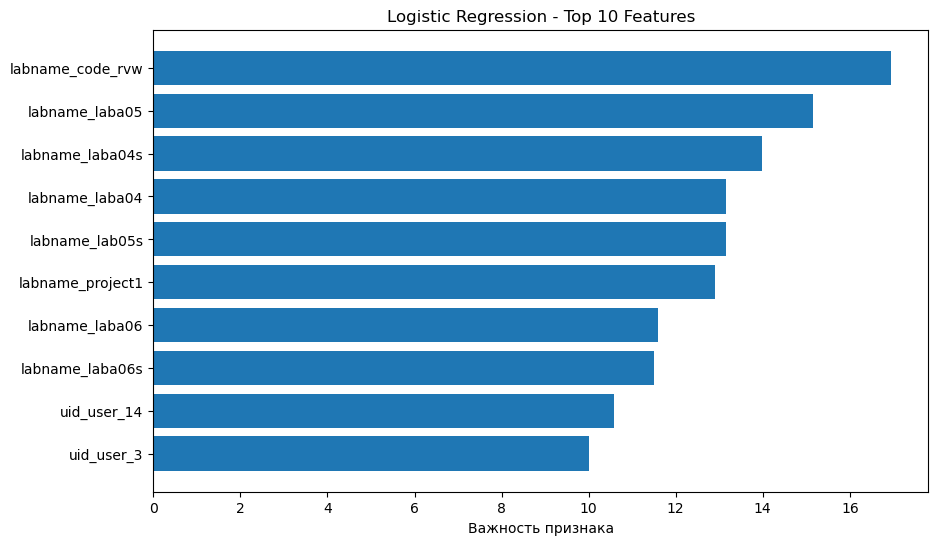

In [459]:
# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

# –°—É–º–º–∏—Ä—É–µ–º –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º
logreg_importance = np.sum(np.abs(logreg.coef_), axis=0)
# logreg_importance = np.sum((logreg.coef_), axis=0)

    # –í –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–∂–µ—Ç:

    # –°–∏–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫ (+0.8)
    # –°–ª–∞–±–æ –≤–ª–∏—è—Ç—å –Ω–∞ –≤—Ç–æ—Ä–Ω–∏–∫ (-0.1)
    # –°—Ä–µ–¥–Ω–µ –≤–ª–∏—è—Ç—å –Ω–∞ —Å—Ä–µ–¥—É (+0.3)

    # –û–±—â–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞ = —Å—É–º–º–∞ –µ–≥–æ –≤–ª–∏—è–Ω–∏—è –Ω–∞ –í–°–ï –∫–ª–∞—Å—Å—ã.

plot_feature_importance(logreg_importance, feature_names, title="Logistic Regression - Top 10 Features")

## SVC

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses ‚Äúone vs one‚Äù strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [460]:
# –ü—Ä–æ–±—É–µ–º —Ä–∞–∑–Ω—ã–µ —è–¥—Ä–∞
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_results = {}

for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=21)
    svc.fit(X_processed, y)
    svc_pred = svc.predict(X_processed)
    svc_acc = accuracy_score(y, svc_pred)
    svc_results[kernel] = svc_acc
    print(f"SVC {kernel}: {svc_acc:.4f}")

SVC linear: 0.7028
SVC poly: 0.8594
SVC rbf: 0.8559
SVC sigmoid: 0.3998


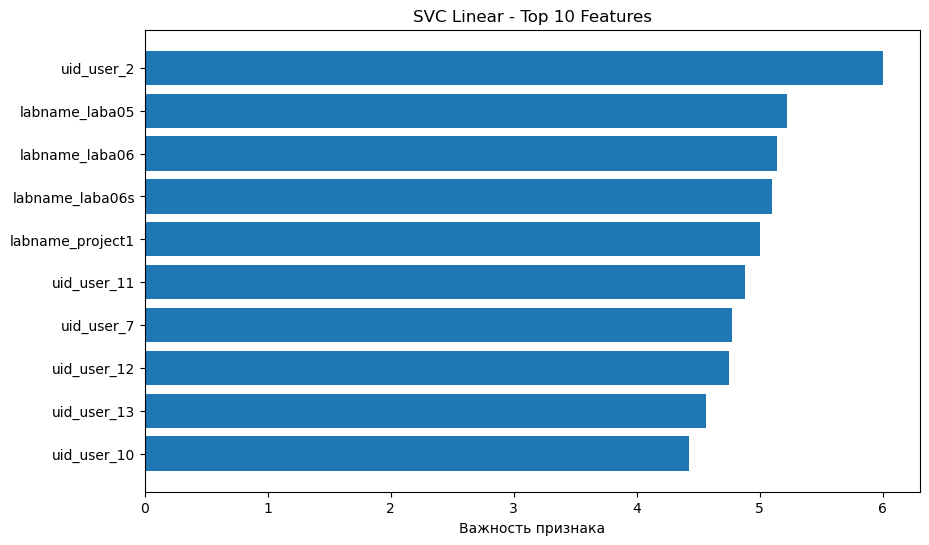

In [461]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º –ª–∏–Ω–µ–π–Ω–æ–µ —è–¥—Ä–æ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
svc_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=21))
svc_ovr.fit(X_processed, y)

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è SVC —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º
svc_importance = np.sum(np.abs([estimator.coef_[0] for estimator in svc_ovr.estimators_]), axis=0)
plot_feature_importance(svc_importance, feature_names, title="SVC Linear - Top 10 Features")

## Decision tree

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [462]:
# –ü—Ä–æ–±—É–µ–º —Ä–∞–∑–Ω—ã–µ –≥–ª—É–±–∏–Ω—ã
depths = [3, 4, 5, 6, 7, 8, 10]
tree_results = {}

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=21)
    tree.fit(X_processed, y)
    tree_pred = tree.predict(X_processed)
    tree_acc = accuracy_score(y, tree_pred)
    tree_results[depth] = tree_acc
    print(f"Decision Tree depth={depth}: {tree_acc:.4f}")

Decision Tree depth=3: 0.4899
Decision Tree depth=4: 0.5516
Decision Tree depth=5: 0.6109
Decision Tree depth=6: 0.6637
Decision Tree depth=7: 0.7064
Decision Tree depth=8: 0.7503
Decision Tree depth=10: 0.8197


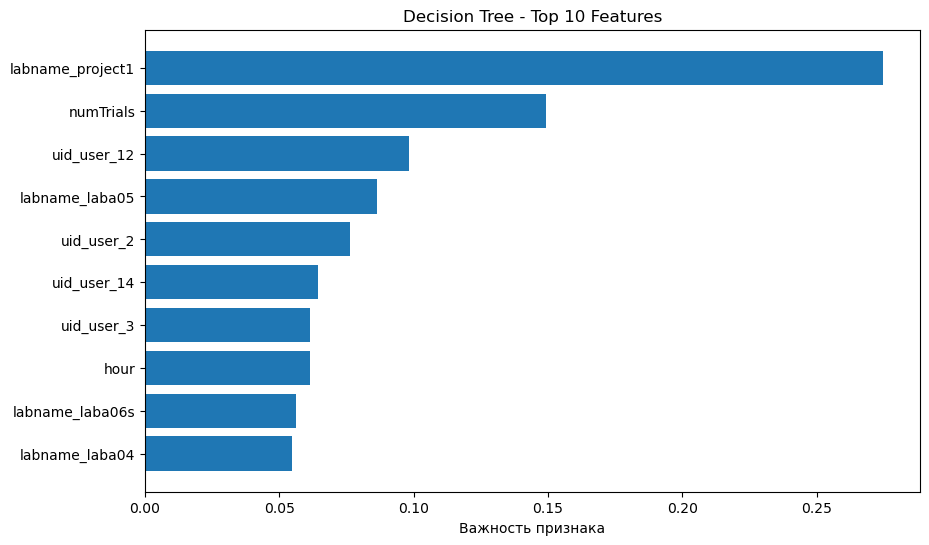

In [463]:
# –ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å —Å –≥–ª—É–±–∏–Ω–æ–π 4
tree_base = DecisionTreeClassifier(max_depth=4, random_state=21)
tree_base.fit(X_processed, y)

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É –¥–µ—Ä–µ–≤—å–µ–≤ –µ—Å—Ç—å –≤—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è
tree_importance = tree_base.feature_importances_
plot_feature_importance(tree_importance, feature_names, title="Decision Tree - Top 10 Features")


## Random forest

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [464]:
# –ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å
rf_base = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_base.fit(X_processed, y)
rf_pred = rf_base.predict(X_processed)
rf_accuracy = accuracy_score(y, rf_pred)
print(f"Random Forest baseline: {rf_accuracy:.4f}")

Random Forest baseline: 1.0000


In [465]:
# –ü—Ä–æ–±—É–µ–º —Ä–∞–∑–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
n_estimators_list = [50, 100, 200]
max_depths = [15, 20, 25, 30]

print("–ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ Random Forest:")
best_params = {}
best_score = 0

for n_est in n_estimators_list:
    for depth in max_depths:
        rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=21)
        rf.fit(X_processed, y)
        rf_pred = rf.predict(X_processed)
        rf_acc = accuracy_score(y, rf_pred)
        print(f"n_estimators={n_est}, max_depth={depth}: {rf_acc:.4f}")
        
        if rf_acc > best_score:
            best_score = rf_acc
            best_params = {'n_estimators': n_est, 'max_depth': depth}

print(f"\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {best_params} —Å accuracy: {best_score:.4f}")

–ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ Random Forest:
n_estimators=50, max_depth=15: 0.9786
n_estimators=50, max_depth=20: 0.9970
n_estimators=50, max_depth=25: 1.0000
n_estimators=50, max_depth=30: 1.0000
n_estimators=100, max_depth=15: 0.9781
n_estimators=100, max_depth=20: 0.9964
n_estimators=100, max_depth=25: 1.0000
n_estimators=100, max_depth=30: 1.0000
n_estimators=200, max_depth=15: 0.9792
n_estimators=200, max_depth=20: 0.9964
n_estimators=200, max_depth=25: 1.0000
n_estimators=200, max_depth=30: 1.0000

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 50, 'max_depth': 25} —Å accuracy: 1.0000


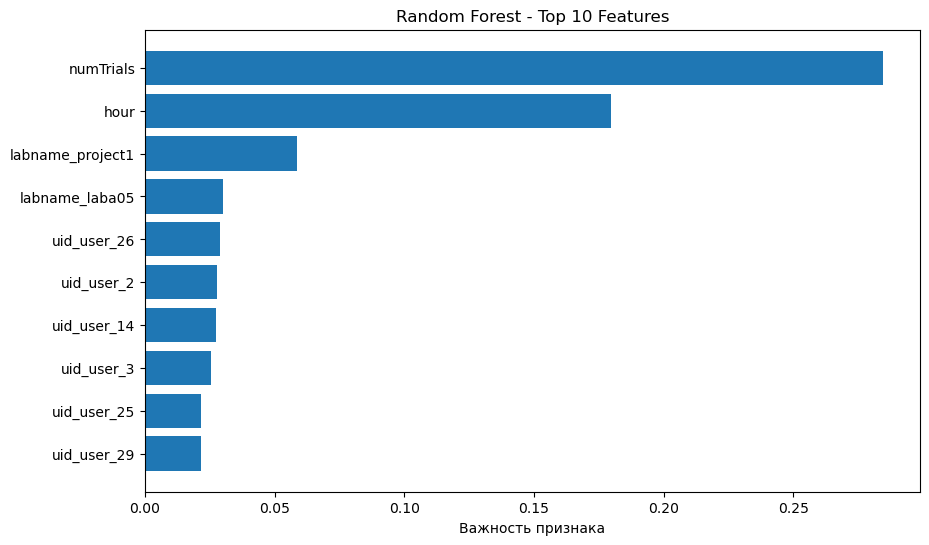

In [466]:
# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É Random Forest –µ—Å—Ç—å –≤—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è
rf_importance = rf_base.feature_importances_
plot_feature_importance(rf_importance, feature_names, title="Random Forest - Top 10 Features")

```
–ö–ª—é—á–µ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
üå≥ n_estimators - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤

–ë–æ–ª—å—à–µ –¥–µ—Ä–µ–≤—å–µ–≤ = –æ–±—ã—á–Ω–æ –ª—É—á—à–µ –∫–∞—á–µ—Å—Ç–≤–æ, –Ω–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ
–°—Ç–∞–Ω–¥–∞—Ä—Ç: 100-200 –¥–ª—è –Ω–∞—á–∞–ª–∞
–ü—Ä–∏–Ω—Ü–∏–ø: "–û–¥–∏–Ω –¥—É—Ä–∞–∫ –º–æ–∂–µ—Ç –æ—à–∏–±–∏—Ç—å—Å—è, —Å—Ç–æ –¥—É—Ä–∞–∫–æ–≤ –¥–∞—é—Ç –º—É–¥—Ä—ã–π –æ—Ç–≤–µ—Ç"

üìè max_depth - –≥–ª—É–±–∏–Ω–∞ –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞

–ú–µ–ª–∫–∏–µ –¥–µ—Ä–µ–≤—å—è (1-3) = –Ω–µ–¥–æ–æ–±—É—á–µ–Ω–∏–µ
–ì–ª—É–±–æ–∫–∏–µ –¥–µ—Ä–µ–≤—å—è (None) = –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ
–ó–æ–ª–æ—Ç–∞—è —Å–µ—Ä–µ–¥–∏–Ω–∞: 10-25

üé≤ max_features - –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è

'sqrt' = ‚àö(–∫–æ–ª-–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) ‚Üê —Å—Ç–∞–Ω–¥–∞—Ä—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
–ú–µ–Ω—å—à–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ = –±–æ–ª—å—à–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è –º–µ–∂–¥—É –¥–µ—Ä–µ–≤—å—è–º–∏
–í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ = –¥–µ—Ä–µ–≤—å—è —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –ø–æ—Ö–æ–∂–∏–º–∏
```